![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Albane Colmenares
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

***business problem***

The project's goal is to provide Microsoft's head of new movie studio with 3 recommendations for the new movie studio they are creating. The actionable insights are based on data on existing movies' performances by understanding which movies are doing best at the box office. 

From this data, this project will analyze potential causes for these movies to perform so well and how Microsoft can use this information to build their own successful movies.


***data***


***methods*** 

correlation 

***results***


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding


<ins>* Where did the data come from, how do they relate to the data analysis questions***</ins>

The data comes from... 
Main movies' data collection websites: Box Office Mojo, df_imdb, Rotten Tomatoes, The Movie Database, and The Numbers


<ins>* What do the data represent? Who is in the sample and what variables are included?</ins>

The data represents all movies' key metrics of performance and descriptions: 

Basic movie's descriptions
- their title 
- the studio that created the movie
- in what year the movie first went out in theaters
- how long the movie runs for 
- what genre it belongs to
- in which language it is 
- if the movie and the movie's title was translated 


The persons involved in the movie's creation:
- actors
- directors 
- writers


How movies were received
- ratings
- by the general public
- by journalists 


Movies' key performance metrics

- revenue generated at box office domestically
- revenue generated at box office in foreign countries 
- budget invested to make the movie




<ins>* What is the target variable?</ins>

The target variable is profit which is calculated by the sum of domestic and foreign box office revenue divided by the budget invested in the movie created. 


<ins>* What are the properties of the variables you intend to use? </ins>



## Data Preparation


***Indicate here what is being done to prepare the data***

5 sources provided 6 sources of data: 
1. Box Office Mojo: bom.movie_gross.csv.gz

2. df_imdb: im.db.zip 

3. Rotten Tomatoes: 
* rt.movie_info.tsv.gz 
* & rt.reviews.tsv.gz

4. The Movie Database: tmdb.movies.csv.gz

5. The Numbers: tn.movie_budgets.csv.gz



The next lines of codes will open all data sources to understand what information is accessible, what needs to be cleaned or transformed to use the data for the analysis.


#### Importing standard packages

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

%matplotlib inline


#### 1. Box Office Mojo Dataset

In [2]:

# Loading bom.movie_gross and storing data into df_bom
df_bom = pd.read_csv('data/bom.movie_gross.csv.gz', compression='gzip')

df_bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Inspect overall shape and info of the dataframe
df_bom.shape
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## -- Data Cleaning

In [4]:
# Dropping rows
df_bom = df_bom[df_bom['studio'].notna()]
# Verifying that na rows were dropped 
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [5]:
# All movies that don't have domestic revenue have foreign revenues so 
# they were distributed oversees 

In [6]:
# Convert foreign_gross column as float
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(',','').astype(np.float64)

# Filling na values with 0 on both columns:
df_bom.update(df_bom[['domestic_gross', 'foreign_gross']].fillna(0))

df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


## Data Cleaning --

#### 2. df_imdb

In [7]:
# Loading and inspecting available datasets
# Loading bom.movie_gross and storing data into df_bom

import zipfile
with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [8]:
# Loading im.db and storing data into df_df_imdb

# Creating connection to database
conn = sqlite3.connect('data/im.db')

# Creating a cursor
cur = conn.cursor()


In [9]:
# Opening df_imdb database
df_imdb = pd.read_sql("""
                SELECT * 
                FROM sqlite_master
                ;
""", con=conn)
df_imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [10]:
# Now  each table that are contained in df_imdb into a dataframe


In [11]:
# Opening and storing movie_basics table

movie_basics = pd.read_sql(
"""
SELECT * 
FROM movie_basics
;
"""
, con=conn)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
movie_basics.info()

# start_year will be used to merge the dataframes and is an integer type: 
# will convert the string to integrer type in df_tn



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
# Opening and storing directors table

directors_df = pd.read_sql(
"""
SELECT * 
FROM directors
;
"""
, con=conn)

directors_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [14]:
# Opening and storing known_for table

known_for_df = pd.read_sql(
"""
SELECT * 
FROM known_for
;
"""
, con=conn)

known_for_df

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [15]:
# Opening and storing movie_akas table

movie_akas_df = pd.read_sql(
"""
SELECT * 
FROM movie_akas
;
"""
, con=conn)

movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


## -- Data Exploration 
May not be needed  

In [16]:
# movie_id for Marvel's The Avengers where original_title = 1 
movie_akas_df[(movie_akas_df["title"].str.contains("Avengers")) & (movie_akas_df["is_original_title"] == 1)]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
69881,tt2395427,24,Avengers: Age of Ultron,None,None,original,None,1.0
81106,tt0848228,19,The Avengers,None,None,original,None,1.0
190575,tt4154796,15,Avengers: Endgame,None,None,original,None,1.0
311338,tt4154756,30,Avengers: Infinity War,None,None,original,None,1.0


In [17]:
# what are region and attributes

# region
movie_akas_df[movie_akas_df["region"].notnull()]


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [18]:
# attributes

movie_akas_df[movie_akas_df["attributes"].notnull()]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
12,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
13,tt0369610,22,Jurassic World 3D,DE,None,None,3-D version,0.0
14,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
21,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
...,...,...,...,...,...,...,...,...
331578,tt8899108,2,Volviendo a casa,UY,None,None,original subtitled version,0.0
331590,tt8997034,1,Little Germanics,XWW,en,None,informal literal English title,0.0
331633,tt9190740,1,Car Ribna Wali,IN,ur,None,alternative transliteration,0.0
331660,tt9447768,1,The Town School,LK,None,None,alternative transliteration,0.0


## Data Exploration --
May not be needed  

In [19]:
# Opening and storing movie_ratings table

movie_ratings_df = pd.read_sql(
"""
SELECT * 
FROM movie_ratings
;
"""
, con=conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [20]:
# Opening and storing persons table

persons_df = pd.read_sql(
"""
SELECT * 
FROM persons
;
"""
, con=conn)

persons_df


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [21]:
# Opening and storing principals table

principals_df = pd.read_sql(
"""
SELECT * 
FROM principals
;
"""
, con=conn)

principals_df

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [22]:
# Opening and storing writers table

writers_df = pd.read_sql(
"""
SELECT * 
FROM writers
;
"""
, con=conn)

writers_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


#### 3. rt.movie_info.tsv

In [23]:
# Inspecting rt.movie_info file
# Loading rt.movie_info and storing data into df_rt

df_rt = pd.read_csv('data/rt.movie_info.tsv.gz', compression='gzip', sep='\t')

df_rt.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [24]:
# Inspect overall shape and info of the dataframe
df_rt.shape
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## -- Data Exploration 
may not be needed 

In [25]:
# are there other currencies than box office? 

df_rt[df_rt["currency"].notnull()]["currency"].unique()

# no - only $

array(['$'], dtype=object)

## Data Exploration --
may not be needed 

#### 4. rt.reviews.tsv

In [26]:
# Inspecting rt.reviews file
# Loading rt.reviews and storing data into df_reviews

df_reviews = pd.read_csv('data/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding = 'unicode_escape')
df_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [27]:
# Inspect overall shape and info of the dataframe
df_reviews.shape
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### 5. tmdb.movies.csv

In [28]:
# Inspecting tmdb.movies file
# Loading tmdb.movies and storing data into df_tmdb
# Dropping the unnamed column as well 


df_tmdb = pd.read_csv('data/tmdb.movies.csv.gz', compression='gzip', index_col=0)
df_tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


If needed to change genre ids, use: explode. 


In [29]:
# Inspect overall shape and info of the dataframe
df_tmdb.shape
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## -- Data Cleaning

In [30]:
# df_tmdb.genre_ids[0]
df_tmdb.genre_ids = df_tmdb.genre_ids.apply(lambda x: x[1:-1].split(','))
df_tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
# Data Exploration

df_tmdb[df_tmdb["original_title"].str.contains("(?i)avatar")]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1831,[],278698,en,Avatar Spirits,0.600,2010-06-22,Avatar Spirits,9.5,2
3387,"[878, 27, 53]",79582,en,Aliens vs. Avatars,2.199,2011-09-20,Aliens vs. Avatars,2.4,12
23157,"[12, 10751]",460441,en,Avatar Flight of Passage,0.600,2017-05-01,Avatar Flight of Passage,10.0,1


In [32]:
type(df_tmdb.genre_ids[0])

list

In [33]:
df_tmdb.explode('genre_ids')


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


#### 6. tn.movie_budgets.csv

In [34]:
# Inspecting tn.movie_budgets file
# Loading tn.movie_budgets and storing data into df_tn

df_tn = pd.read_csv('data/tn.movie_budgets.csv.gz', compression="gzip")


## -- Data Cleaning 

The movie column was saved in the file with non-ascii characters, so these need to be cleaned to be used. 

The column needs to be encoded as the raw file contains them, to decoded to be read as string again, to replace the characters.

In [35]:
df_tn["clean_movie"] = df_tn["movie"].str.encode('ascii', errors='replace').str.decode('utf-8')

# df_tn["clean_movie"] = df_tn["movie"].str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

In [36]:
df_tn[df_tn["clean_movie"].str.contains("Pirates")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",Pirates of the Caribbean: At World???s End
24,25,"May 26, 2017",Pirates of the Caribbean: Dead Men Tell No Tales,"$230,000,000","$172,558,876","$788,241,137",Pirates of the Caribbean: Dead Men Tell No Tales
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Manâs Chest,"$225,000,000","$423,315,812","$1,066,215,812",Pirates of the Caribbean: Dead Man???s Chest
205,6,"Jul 9, 2003",Pirates of the Caribbean: The Curse of the Bla...,"$140,000,000","$305,411,224","$634,954,103",Pirates of the Caribbean: The Curse of the Bla...
1033,34,"Apr 27, 2012",The Pirates! Band of Misfits,"$55,000,000","$31,051,126","$136,143,605",The Pirates! Band of Misfits
1530,31,"Jul 1, 1986",Pirates,"$40,000,000","$1,641,825","$6,341,825",Pirates
3086,87,"Jan 11, 2008",The Pirates Who Don't Do Anything: A VeggieTal...,"$15,000,000","$12,981,269","$13,248,444",The Pirates Who Don't Do Anything: A VeggieTal...
3787,88,"Mar 16, 1984",The Ice Pirates,"$9,000,000","$13,075,390","$13,075,390",The Ice Pirates


In [37]:
df_tn.shape
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   clean_movie        5782 non-null   object
dtypes: int64(1), object(6)
memory usage: 316.3+ KB


In [38]:
# Make all number columns as integers
columns_to_integers = ["production_budget" , "domestic_gross", "worldwide_gross"]

for column in columns_to_integers:
    df_tn[column] = df_tn[column].astype(str).str.replace(",", '').str.replace("$", "").astype(np.int)

df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Red 11
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Following
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Return to the Land of Wonders
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,A Plague So Pleasant


## Transformation. Exploration?

In [39]:
# Create year column

df_tn["worldwide_profit"] = df_tn["worldwide_gross"] - df_tn["production_budget"]

# df_tn["worldwide_profit"]

In [40]:
# Create profit column

df_tn["year"] = df_tn["release_date"].str[-4:].astype(int)

# df_tn["year"]

## Data Exploration


Start building the information that is needed to answer the question 

—> create the data frame to answer each question 

1. Creating the profit metric to determine which movies performed the highest
2. 1st correlation to test: genre and box office 
3. 2nd correlation to test: .... and box office
4. 3rd correlation to test: actors and box office



Main metric determining the success of a movie = worldwide profit calculted from gross box office as the focus is how a movie is performing at box office.  
Years of analysis will be from 2010 to 2018 to focus on short term profit. 

Movie_basics data only contain movies from 2010 to 2018.

Both Box Office Mojos and The Numbers' data sources display this information.
Worldwide gross on both tables display similar amounts. 


<br>Data from The Numbers will be used to base the analysis on: it contains domestic, foreign, worldwide gross, similarly to Box Office Mojos' data. 
<br>In addition, it contains movies from 1915 to 2020, while BOM data only contains data from 2010 to 2018.

In [41]:
# Create a column total gross 
df_bom["worldwide_gross"] = df_bom["domestic_gross"] + df_bom["foreign_gross"]

In [42]:
# Sorting by highest total revenue generated by movies
df_bom.sort_values(by=["worldwide_gross"], ascending=False, inplace=True)
df_bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...,...
3078,2:22,Magn.,400.0,0.0,2017,4.000000e+02
2756,News From Planet Mars,KL,300.0,0.0,2016,3.000000e+02
2757,Satanic,Magn.,300.0,0.0,2016,3.000000e+02
2321,The Chambermaid,FM,300.0,0.0,2015,3.000000e+02


But according to the Numbers, Avatar and Titanic are first 

In [43]:
# Sorting by highest total profit generated by movies
df_tn.sort_values(by=["worldwide_profit"], ascending=False, inplace=True)
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar,2351345279,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Titanic,2008208395,1997
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jurassic World,1433854864,2015
...,...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,Town & Country,-94635231,2001
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,Men in Black: International,-106900000,2019
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,Mars Needs Moms,-110450242,2011
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,Moonfall,-150000000,2020


In [44]:
# Does BOM have any data on Avatar? 
# Avatar was released on 2009 while BOM data does not seem to capture this information 

In [45]:
# Verifying the years captured in BOM data to determine which data to base analysis on
df_bom[df_bom["title"].str.contains("Avatar")]

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
128,Avatar: Special Edition,Fox,10700000.0,22500000.0,2010,33200000.0


In [46]:
years_bom = df_bom["year"].unique().tolist()
# sorted(years_bom)

In [47]:
years_tn = df_tn["year"].unique().tolist()
# sorted(years_tn)

In [48]:
years_movie_basics = movie_basics["start_year"].unique().tolist()
sorted(years_movie_basics)

[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2115]

In [49]:
# The Numbers' data contains movies from 1915 to 2020, while BOM data only contains data from 2010 to 2018.

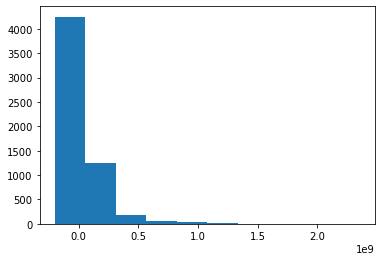

The histogram is highly skewed to the left, indicating most movies are far from making as much as the top performers 


In [50]:
# See distribution through histograms to determine which movies to focus on
x = df_tn["worldwide_profit"]
# y = df_tn["id"]
num_bins = 10
plt.hist(x, num_bins)
plt.show()

print("The histogram is highly skewed to the left, indicating most movies are far from making as much as the top performers ")

In [51]:
# Filter on movies that have a profit of at least 500,000 and from 2010

In [52]:
df_top_tn = df_tn[(df_tn["worldwide_profit"] > 500000) & (df_tn["year"] > 2009)]
len(df_top_tn)

1286

In [53]:
# Filtering on the most recent years: from 2010 onwards 

df_top_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jurassic World,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Furious 7,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,The Avengers,1292935897,2012


In [54]:
# Creating movie_episode column

In [55]:
# Under movie_episode, keeping only what comes after ":", replace the na values with "" and lower cap all strings

df_top_tn["movie_episode"] = df_top_tn["clean_movie"].map(lambda x: x.split(r":")).str[1].fillna("").str.lower()

# Replace roman numbers for part 1 and 2 for Harry Potter and the Deathly Hallows:

df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace("part ii", "part 2", regex=False).str.replace("part i", "part 1", regex=False)
# df_top_tn[["movie_episode_lambda", "movie_episode"]]

# Remove comas for Twilight:
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace(",", "", regex=False)

# Remove hyphen for Hunger Games:
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace(" -", "", regex=False)

# Create space between mission impossible and rest of the movie title, removed by the removal of non-ascii characters
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace("impossible", "impossible ", regex=False)

# Spiderman contains 3D, to remove
df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace(" 3d", "", regex=False)

df_top_tn[df_top_tn["clean_movie"].str.contains("(?i)spider")]
# verifying this doesn't cause null movies
# df_top_tn


<ipython-input-55-480293349804>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_tn["movie_episode"] = df_top_tn["clean_movie"].map(lambda x: x.split(r":")).str[1].fillna("").str.lower()
<ipython-input-55-480293349804>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_tn["movie_episode"] = df_top_tn["movie_episode"].str.replace("part ii", "part 2", regex=False).str.replace("part i", "part 1", regex=False)
<ipython-input-55-480293349804>:11: SettingWithCopyWarning: 
A value is trying to be set o

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode
98,99,"Jul 7, 2017",Spider-Man: Homecoming,175000000,334201140,880166350,Spider-Man: Homecoming,705166350,2017,homecoming
30,31,"Jul 3, 2012",The Amazing Spider-Man,220000000,262030663,757890267,The Amazing Spider-Man,537890267,2012,
55,56,"May 2, 2014",The Amazing Spider-Man 2,200000000,202853933,708996336,The Amazing Spider-Man 2,508996336,2014,
443,44,"Dec 14, 2018",Spider-Man: Into The Spider-Verse 3D,90000000,190173195,375381768,Spider-Man: Into The Spider-Verse 3D,285381768,2018,into the spider-verse


In [56]:
# if df_top_tn["decoded_movie"].str.contains("(?i)star wars").any():
#     df_top_tn["movie_title_lambda"] = df_top_tn["decoded_movie"].str.split(".").str[0]
# else:
#     df_top_tn["movie_title_lambda"] = df_top_tn["decoded_movie"]

In [57]:
# Previous column movie_episode
# df_top_tn["movie_episode"] = df_top_tn["decoded_movie"].str.split(r":").str[1].fillna("").str.lower().str.replace("part ii", "part 2", regex=False).str.replace("part i", "part 1", regex=False).str.replace(",", "", regex=False).str.replace(" -", "", regex=False).str.replace("impossible", "impossible ", regex=False).str.replace("spider-", "spider", regex=False)


In [58]:
# for a, b in to_replace_title, to_replace_with_title:
#     if movie_episode contains "part ii":
#         str.replace("part ii", "part 1", regex=False)
#     else:
#         keep movie_episode

In [59]:
# Creating column movie_title if there were more than 1 movie
df_top_tn["movie_title"] = df_top_tn["clean_movie"].str.split("Ep\.").str[0].str.split("\bPart\b").str[0].str.split(r"[:)(!]").str[0].str.strip().str.lower()
# Leaving the "'"
# df_top_tn["movie_title"] = df_top_tn["clean_movie"].str.split("Ep\.").str[0].str.split("\bPart\b").str[0].str.split(r"[:)(]").str[0].str.strip().str.lower().str.replace(" the lorax", "the lorax", regex=False).str.replace("the hangover 3", "the hangover part iii")


# Creating column combining the movie title and the episode to have the same way in both
df_top_tn["movie_title_episode"] = df_top_tn["movie_title"].str.replace(".", "", regex=False) + df_top_tn["movie_episode"].str.lower()


# Changing "???" and to space,  and "??" to "e" and changing apostrophe to ', and changing all "&" to "and" 
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("???", " ", regex=False).str.replace("??", "e", regex=False).str.replace("'", " ", regex=False).str.replace("&", "and", regex=False)

# Extract Dr Seuss and Doctor Seuss, removing extra space on The Lorax and The Grinch 
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("dr seuss ", "", regex=False).str.replace("doctor seuss ", "", regex=False).str.replace(" the lorax", "the lorax", regex=False).str.replace(" the grinch", "the grinch", regex=False)

# Mission impossible extra space
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("impossible ", "impossible", regex=False)

# Monster Hunt
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("zhuo yao ji", "monster hunt", regex=False)

# The Conjuring
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the conjuring 2 the enfield poltergeist", "the conjuring 2", regex=False)

# The Hangover Part III
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the hangover 3", "the hangover part iii", regex=False)

# We're the millers 
# df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("were the millers", "we re the millers", regex=False)

# John Wick 3 Parabellum
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("john wick chapter 3   parabellum", "john wick chapter 3 parabellum", regex=False)

# Changing Disney Planes to Planes
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("disney planes", "planes", regex=False)

# Changing Disney Planes to Planes
df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the divergent series insurgent", "insurgent", regex=False)

# # Changing Disney Planes to Planes
# df_top_tn["movie_title_episode"] = df_top_tn["movie_title_episode"].str.replace("the divergent series insurgent", "insurgent", regex=False)

# For verification
df_top_tn[df_top_tn["clean_movie"].str.contains("(?i)millers")]

<ipython-input-59-344ce51399b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_tn["movie_title"] = df_top_tn["clean_movie"].str.split("Ep\.").str[0].str.split("\bPart\b").str[0].str.split(r"[:)(!]").str[0].str.strip().str.lower()
<ipython-input-59-344ce51399b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_tn["movie_title_episode"] = df_top_tn["movie_title"].str.replace(".", "", regex=False) + df_top_tn["movie_episode"].str.lower()
<ipython-input-59-344ce51399b6>:12: SettingWithCopyWarnin

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode,movie_title,movie_title_episode
1589,90,"Aug 7, 2013",We're the Millers,37000000,150394119,267816276,We're the Millers,230816276,2013,,we're the millers,we re the millers


In [60]:
# Verifying that no movie_title_episode is empty
df_top_tn[df_top_tn["movie_title_episode"] == ""]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode,movie_title,movie_title_episode


In [61]:
# For troubleshoot: replace spaces with "_"
df_top_tn[df_top_tn["movie_title_episode"].str.contains("(?i)insurgent", na=False)]["movie_title_episode"].str.replace(" ", "_",regex=False)

321    insurgent
Name: movie_title_episode, dtype: object

## -- Data Cleaning

In [62]:
# Data cleaning movie_basics  
movie_basics["clean_primary"] = movie_basics["primary_title"].str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')


## Data Cleaning --

In [63]:
# Same process in movie_basics 

# pattern = '|'.join(['episode vii - ', "(?i)the mermaid", ".", "&"])
# replacement = '|'.join(["", "mei ren yu", "", "and"])

# Creating column movie_episode if there were more than 1 movie
movie_basics["movie_episode"] = movie_basics["clean_primary"].str.split(r":").str[1].fillna("").str.lower()

# Creating column movie_title if there were more than 1 movie
# movie_basics["movie_title"] = movie_basics["clean_primary"].str.split("\bPart\b").str[0].str.split(r"[:)(]").str[0].str.strip().str.replace(".", "", regex=False).str.replace("'", "", regex=False).str.replace("&", "and", regex=False).str.replace("The Mermaid", "mei ren yu", regex=False).str.replace("The Intouchables", "les intouchables", regex=False).str.lower()
movie_basics["movie_title"] = movie_basics["clean_primary"].str.split("\bPart\b").str[0].str.split(r"[:)(]").str[0].str.strip().str.replace(".", "", regex=False).str.replace("&", "and", regex=False).str.replace("The Mermaid", "mei ren yu", regex=False).str.replace("The Intouchables", "les intouchables", regex=False).str.lower()



# Normalizing movie_title for Les Miserables
# movie_basics["movie_title"] = movie_basics["movie_title"].str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

# Creating column combining the movie title and the episode to have the same way in both
movie_basics["movie_title_episode"] = movie_basics["movie_title"] +  movie_basics["movie_episode"].str.lower().str.replace(" episode vii -", "", regex=False).str.replace(" - ", " ", regex=False)
# movie_basics["movie_title_episode"] = movie_basics["movie_title"] +  movie_basics["movie_episode"].str.replace(pattern, replacement, regex=False).str.lower()

# Change apostrophe to space
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("'", " ", regex=False)

# Turn Eight to numeric in Ocean's 8
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("ocean s eight", "ocean s 8", regex=False)

# Correcting Maze Runner
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("the death cure", "maze runner the death cure", regex=False)

# Changing Shazam
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("shazam!", "shazam", regex=False)

# Changing Jackass Bad Grandpa
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("bad grandpa", "jackass presents bad grandpa", regex=False)

# Changing Prince of Persia
movie_basics["movie_title_episode"] = movie_basics["movie_title_episode"].str.replace("prince of persia the sands of time", "prince of persia sands of time", regex=False)


# For verification
movie_basics[movie_basics["original_title"].str.contains("(?i)sands of time", na=False)].head(100)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,clean_primary,movie_episode,movie_title,movie_title_episode
176,tt0473075,Prince of Persia: The Sands of Time,Prince of Persia: The Sands of Time,2010,116.0,"Action,Adventure,Fantasy",Prince of Persia: The Sands of Time,the sands of time,prince of persia,prince of persia sands of time


In [64]:
# For troubleshoot: replace spaces with "_"
movie_basics[movie_basics["movie_title_episode"].str.contains("(?i)hansel", na=False)]["movie_title_episode"].str.replace(" ", "_",regex=False)

7512               hansel_and_gretel_witch_hunters
27509                  hansel_and_gretel_get_baked
38504     hansel_and_gretel_warriors_of_witchcraft
70676                             hansel_et_gretel
72618                             hansel_vs_gretel
120097                           hansel_und_gretel
140254                           gretel_and_hansel
Name: movie_title_episode, dtype: object

In [65]:
# miserables + spy to remove other years

In [66]:
top_movies = pd.merge(df_top_tn, movie_basics, how="left", 
                     left_on=["movie_title_episode", "year"], 
                     right_on=["movie_title_episode", "start_year"])

In [67]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1320
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1321 non-null   int64  
 1   release_date         1321 non-null   object 
 2   movie                1321 non-null   object 
 3   production_budget    1321 non-null   int64  
 4   domestic_gross       1321 non-null   int64  
 5   worldwide_gross      1321 non-null   int64  
 6   clean_movie          1321 non-null   object 
 7   worldwide_profit     1321 non-null   int64  
 8   year                 1321 non-null   int64  
 9   movie_episode_x      1321 non-null   object 
 10  movie_title_x        1321 non-null   object 
 11  movie_title_episode  1321 non-null   object 
 12  movie_id             1135 non-null   object 
 13  primary_title        1135 non-null   object 
 14  original_title       1135 non-null   object 
 15  start_year           1135 non-null   f

The null rows all represent less than $400 M and the sample already contains more than 1700 rows so null values will be dropped.  

In [68]:
# Verification: 2 conditions 
top_movies[(top_movies["movie_id"].isnull()) & (top_movies["clean_movie"].str.contains("insurgent")) ][:20][["clean_movie","movie","movie_title_episode"]].head(100)

,clean_movie,movie,movie_title_episode


In [69]:
# Verification: 1 condition
top_movies[top_movies["movie_id"].isnull()][:20][["year", "clean_movie","movie","movie_title_episode"]].head(100)
           
      
           

,year,clean_movie,movie,movie_title_episode
98,2012,Les Intouchables,Les Intouchables,les intouchables
156,2015,Kingsman: The Secret Service,Kingsman: The Secret Service,kingsman the secret service
160,2016,Zhuo yao ji,Zhuo yao ji,monster hunt
180,2015,Taken 3,Taken 3,taken 3
186,2017,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,resident evil the final chapter
187,2017,Split,Split,split
248,2015,Paddington,Paddington,paddington
361,2011,Mr. Poppers's Penguins,Mr. Poppers's Penguins,mr poppers s penguins
362,2016,Xi You Ji zhi Sun Wu Kong San Da Bai Gu Jing,Xi You Ji zhi Sun Wu Kong San Da Bai Gu Jing,xi you ji zhi sun wu kong san da bai gu jing
368,2017,John Wick: Chapter Two,John Wick: Chapter Two,john wick chapter two


In [70]:
null_movies = top_movies[top_movies["movie_id"].isnull()]["clean_movie"]
# null_movies.tolist()

In [71]:
# top_movies.groupby("year","clean_movie")[""]

In [72]:
top_profit_movies = top_movies.dropna(subset=["movie_id"])

In [73]:
top_profit_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1320
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1135 non-null   int64  
 1   release_date         1135 non-null   object 
 2   movie                1135 non-null   object 
 3   production_budget    1135 non-null   int64  
 4   domestic_gross       1135 non-null   int64  
 5   worldwide_gross      1135 non-null   int64  
 6   clean_movie          1135 non-null   object 
 7   worldwide_profit     1135 non-null   int64  
 8   year                 1135 non-null   int64  
 9   movie_episode_x      1135 non-null   object 
 10  movie_title_x        1135 non-null   object 
 11  movie_title_episode  1135 non-null   object 
 12  movie_id             1135 non-null   object 
 13  primary_title        1135 non-null   object 
 14  original_title       1135 non-null   object 
 15  start_year           1135 non-null   f

In [74]:
top_profit_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode_x,...,movie_title_episode,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,clean_primary,movie_episode_y,movie_title_y
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,infinity war,...,avengers infinity war,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,infinity war,avengers
1,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015,the force awakens,...,star wars the force awakens,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015.0,136.0,"Action,Adventure,Fantasy",Star Wars: Episode VII - The Force Awakens,episode vii - the force awakens,star wars
2,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jurassic World,1433854864,2015,,...,jurassic world,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World,,jurassic world
3,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Furious 7,1328722794,2015,,...,furious 7,tt2820852,Furious 7,Furious Seven,2015.0,137.0,"Action,Crime,Thriller",Furious 7,,furious 7
4,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,The Avengers,1292935897,2012,,...,the avengers,tt0848228,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",The Avengers,,the avengers


In [75]:
top_profit_movies.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'clean_movie', 'worldwide_profit', 'year',
       'movie_episode_x', 'movie_title_x', 'movie_title_episode', 'movie_id',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'clean_primary', 'movie_episode_y', 'movie_title_y'],
      dtype='object')

In [76]:
# Drop unnecessary columns
top_profit_movies = top_profit_movies.drop(columns=["id","movie","movie_episode_x", "movie_title_x","primary_title", "original_title", "movie_episode_y", "movie_title_y", "start_year"])


,release_date,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_title_episode,movie_id,runtime_minutes,genres,clean_primary
0,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,avengers infinity war,tt4154756,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War
1,"Dec 18, 2015",306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015,star wars the force awakens,tt2488496,136.0,"Action,Adventure,Fantasy",Star Wars: Episode VII - The Force Awakens
2,"Jun 12, 2015",215000000,652270625,1648854864,Jurassic World,1433854864,2015,jurassic world,tt0369610,124.0,"Action,Adventure,Sci-Fi",Jurassic World
3,"Apr 3, 2015",190000000,353007020,1518722794,Furious 7,1328722794,2015,furious 7,tt2820852,137.0,"Action,Crime,Thriller",Furious 7
4,"May 4, 2012",225000000,623279547,1517935897,The Avengers,1292935897,2012,the avengers,tt0848228,143.0,"Action,Adventure,Sci-Fi",The Avengers


In [232]:
# top_profit_movies.head()

In [229]:
# Scatterplot of runtime and movies

In [236]:
profit_and_ratings = top_profit_movies.merge(movie_ratings_df, 
                                         how="inner", 
                                        left_on="movie_id",
                                        right_on="movie_id")

In [237]:
profit_and_ratings = profit_and_ratings.drop(columns=["release_date", "clean_movie", "movie_title_episode", "genres"])
profit_and_ratings.head()

,production_budget,domestic_gross,worldwide_gross,worldwide_profit,year,movie_id,runtime_minutes,clean_primary,main_genre,averagerating,numvotes
0,300000000,678815482,2048134200,1748134200,2018,tt4154756,149.0,Avengers: Infinity War,Action,8.5,670926
1,306000000,936662225,2053311220,1747311220,2015,tt2488496,136.0,Star Wars: Episode VII - The Force Awakens,Action,8.0,784780
2,215000000,652270625,1648854864,1433854864,2015,tt0369610,124.0,Jurassic World,Action,7.0,539338
3,190000000,353007020,1518722794,1328722794,2015,tt2820852,137.0,Furious 7,Action,7.2,335074
4,225000000,623279547,1517935897,1292935897,2012,tt0848228,143.0,The Avengers,Action,8.1,1183655


<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

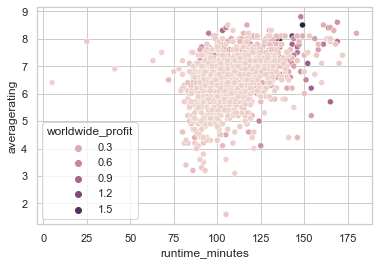

In [239]:
sns.scatterplot(data=profit_and_ratings, 
                x="runtime_minutes", 
                y="averagerating", 
               hue="worldwide_profit")

In [247]:
profit_and_ratings.corr(method='kendall')

,production_budget,domestic_gross,worldwide_gross,worldwide_profit,year,runtime_minutes,averagerating,numvotes
production_budget,1.000000,0.554543,0.650746,0.480852,0.003212,0.241665,0.082968,0.383271
domestic_gross,0.554543,1.000000,0.772044,0.733413,0.037086,0.199930,0.156028,0.432441
worldwide_gross,0.650746,0.772044,1.000000,0.831372,0.039520,0.216621,0.154656,0.480496
worldwide_profit,0.480852,0.733413,0.831372,1.000000,0.050682,0.178629,0.178411,0.454291
year,0.003212,0.037086,0.039520,0.050682,1.000000,0.069368,0.021348,-0.122072
runtime_minutes,0.241665,0.199930,0.216621,0.178629,0.069368,1.000000,0.291271,0.300920
averagerating,0.082968,0.156028,0.154656,0.178411,0.021348,0.291271,1.000000,0.372165
numvotes,0.383271,0.432441,0.480496,0.454291,-0.122072,0.300920,0.372165,1.000000


In [250]:
top_profit_genres.head()

,release_date,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_title_episode,movie_id,runtime_minutes,genres,clean_primary,main_genre
0,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,avengers infinity war,tt4154756,149.0,NaN,Avengers: Infinity War,Action
1,"Dec 18, 2015",306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015,star wars the force awakens,tt2488496,136.0,NaN,Star Wars: Episode VII - The Force Awakens,Action
2,"Jun 12, 2015",215000000,652270625,1648854864,Jurassic World,1433854864,2015,jurassic world,tt0369610,124.0,NaN,Jurassic World,Action
3,"Apr 3, 2015",190000000,353007020,1518722794,Furious 7,1328722794,2015,furious 7,tt2820852,137.0,NaN,Furious 7,Action
4,"May 4, 2012",225000000,623279547,1517935897,The Avengers,1292935897,2012,the avengers,tt0848228,143.0,NaN,The Avengers,Action


In [108]:
# Create dataset for genre evaluation
top_profit_genres = top_profit_movies
top_profit_genres["genres"] = top_profit_movies["genres"].str.split(",")
top_profit_genres["main_genre"] = top_profit_genres["genres"].str[0]

top_profit_genres.head()


AttributeError: Can only use .str accessor with string values!

In [128]:
top_10_genres = top_profit_genres.groupby(["main_genre"])[["worldwide_gross", "worldwide_profit"]].sum().sort_values("worldwide_profit", ascending=False).reset_index()[:10]
top_10_genres

,main_genre,worldwide_gross,worldwide_profit
0,Action,116773469805,82337079805
1,Adventure,50645833404,37273233404
2,Comedy,21769929094,15392479094
3,Drama,16074553460,12183230810
4,Biography,8864816505,6758046505
5,Horror,7185039446,6223939446
6,Crime,4149855259,2826155259
7,Animation,2618078686,2195078686
8,Fantasy,1777512123,1398512123
9,Documentary,1799732034,1220407034


In [246]:
top_10_genres.corr(method='kendall')

,worldwide_gross,worldwide_profit
worldwide_gross,1.000000,0.955556
worldwide_profit,0.955556,1.000000


In [248]:
profit_by_genre = top_profit_genres.groupby(["main_genre"])[["worldwide_gross", "worldwide_profit"]].sum().sort_values("worldwide_profit", ascending=False).reset_index()

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_profit'>

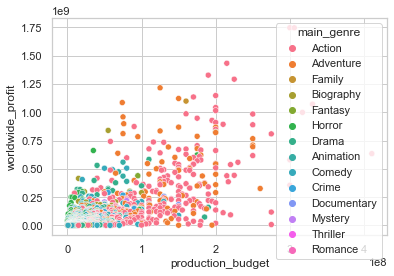

In [259]:
sns.scatterplot(data=top_profit_genres, 
                x="production_budget", 
                y="worldwide_profit",
                hue="main_genre",
               )

/Users/albane/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Primary Genre')

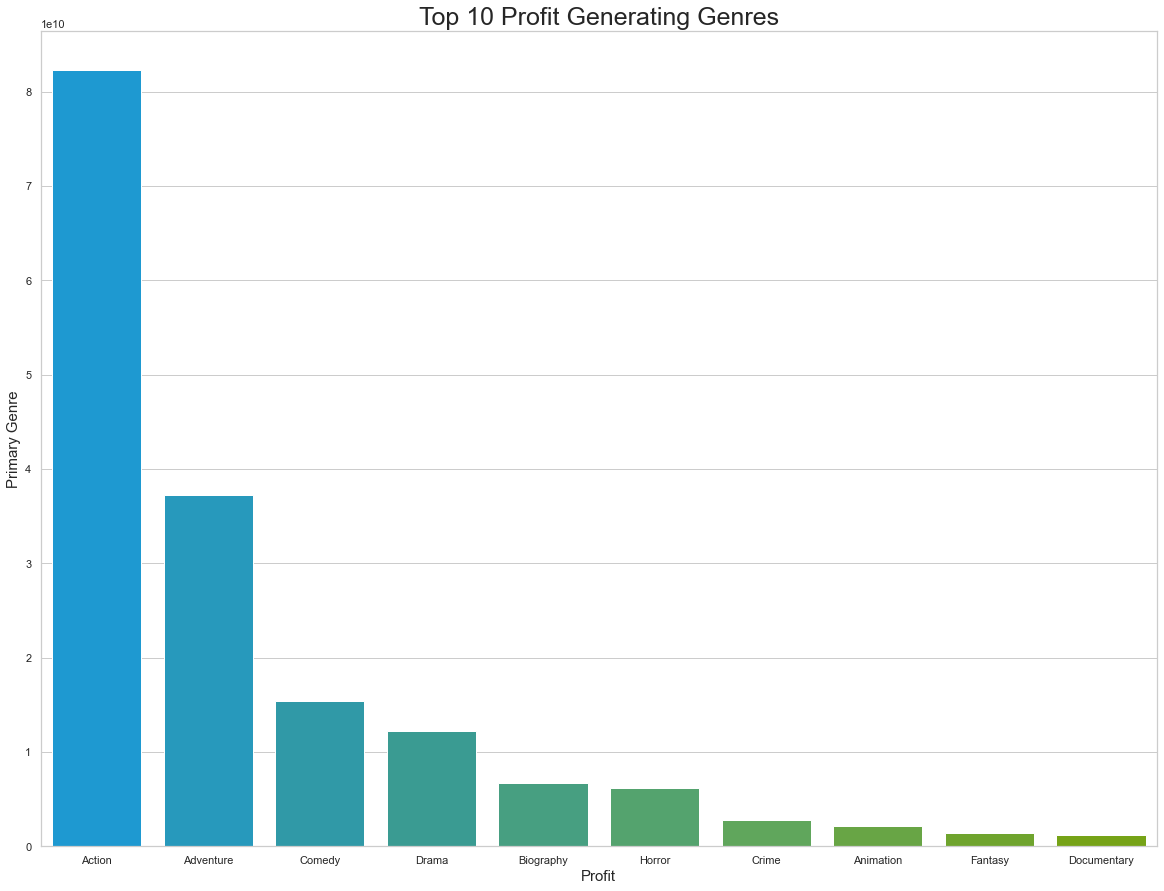

In [160]:
# Displaying sum of profit by genres
fig1, ax1 = plt.subplots(figsize=(20, 15))

x = top_10_genres["main_genre"]
y = top_10_genres["worldwide_profit"]

sns.set(style="whitegrid", color_codes=True)
                        
sns.barplot(x, y, palette='blend:#00A4EF,#7FBA00')

ax1.set_title('Top 10 Profit Generating Genres', fontsize=25)
ax1.set_xlabel('Profit', fontsize=15)
ax1.set_ylabel('Primary Genre', fontsize=15)


In [86]:
print(genre_profit.corr())

                 worldwide_gross
worldwide_gross              1.0


Create a table to identify the actors in top profitable movies

In [165]:
# Filtering only on category of persons identified as actor

In [161]:
df_actors = principals_df[["movie_id", "person_id", "category"]]
df_actors = df_actors[df_actors["category"] == "actor"]
df_actors

,movie_id,person_id,category
0,tt0111414,nm0246005,actor
5,tt0323808,nm2694680,actor
6,tt0323808,nm0574615,actor
14,tt0417610,nm0532721,actor
16,tt0417610,nm0069209,actor
...,...,...,...
1028175,tt9681728,nm10397910,actor
1028176,tt9689618,nm10439726,actor
1028177,tt9689618,nm10439727,actor
1028178,tt9689618,nm10439724,actor


In [162]:
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [178]:
actors_names = pd.merge(df_actors, persons_df, how="inner",
                    left_on=["person_id"],
                    right_on=["person_id"]
                    )

In [179]:
actors_names.head()

,movie_id,person_id,category,primary_name_x,birth_year,death_year,primary_profession,primary_name_y
0,tt0111414,nm0246005,actor,Tommy Dysart,NaN,NaN,actor,Tommy Dysart
1,tt0323808,nm2694680,actor,Henry Garrett,NaN,NaN,actor,Henry Garrett
2,tt0323808,nm0574615,actor,Graham McTavish,1961.0,NaN,"actor,soundtrack,director",Graham McTavish
3,tt1680140,nm0574615,actor,Graham McTavish,1961.0,NaN,"actor,soundtrack,director",Graham McTavish
4,tt7168262,nm0574615,actor,Graham McTavish,1961.0,NaN,"actor,soundtrack,director",Graham McTavish


In [184]:
# Drop unnecessary columns
actors_names = actors_names.drop(columns=["birth_year", "death_year", "primary_profession"])

In [185]:
actors_names

,movie_id,person_id,category,primary_name_x,primary_name_y
0,tt0111414,nm0246005,actor,Tommy Dysart,Tommy Dysart
1,tt0323808,nm2694680,actor,Henry Garrett,Henry Garrett
2,tt0323808,nm0574615,actor,Graham McTavish,Graham McTavish
3,tt1680140,nm0574615,actor,Graham McTavish,Graham McTavish
4,tt7168262,nm0574615,actor,Graham McTavish,Graham McTavish
...,...,...,...,...,...
256556,tt9681728,nm10436663,actor,Artem Leshik,Artem Leshik
256557,tt9681728,nm10397910,actor,Danil Tyabin,Danil Tyabin
256558,tt9689618,nm10439726,actor,Christian Lacroix,Christian Lacroix
256559,tt9689618,nm10439727,actor,Christine Spengler,Christine Spengler


In [186]:
top_profit_movies_actors = pd.merge(top_profit_movies, actors_names, how="inner", 
                                    left_on=["movie_id"], 
                                    right_on=["movie_id"])

In [187]:
top_profit_movies_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2775
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date         2776 non-null   object 
 1   production_budget    2776 non-null   int64  
 2   domestic_gross       2776 non-null   int64  
 3   worldwide_gross      2776 non-null   int64  
 4   clean_movie          2776 non-null   object 
 5   worldwide_profit     2776 non-null   int64  
 6   year                 2776 non-null   int64  
 7   movie_title_episode  2776 non-null   object 
 8   movie_id             2776 non-null   object 
 9   runtime_minutes      2772 non-null   float64
 10  genres               0 non-null      float64
 11  clean_primary        2776 non-null   object 
 12  main_genre           2774 non-null   object 
 13  person_id            2776 non-null   object 
 14  category             2776 non-null   object 
 15  primary_name_x       2776 non-null   o

In [189]:
top_profit_movies_actors.head()

,release_date,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_title_episode,movie_id,runtime_minutes,genres,clean_primary,main_genre,person_id,category,primary_name_x,primary_name_y
0,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,avengers infinity war,tt4154756,149.0,NaN,Avengers: Infinity War,Action,nm0262635,actor,Chris Evans,Chris Evans
1,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,avengers infinity war,tt4154756,149.0,NaN,Avengers: Infinity War,Action,nm0000375,actor,Robert Downey Jr.,Robert Downey Jr.
2,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,avengers infinity war,tt4154756,149.0,NaN,Avengers: Infinity War,Action,nm0749263,actor,Mark Ruffalo,Mark Ruffalo
3,"Apr 27, 2018",300000000,678815482,2048134200,Avengers: Infinity War,1748134200,2018,avengers infinity war,tt4154756,149.0,NaN,Avengers: Infinity War,Action,nm1165110,actor,Chris Hemsworth,Chris Hemsworth
4,"Dec 18, 2015",306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015,star wars the force awakens,tt2488496,136.0,NaN,Star Wars: Episode VII - The Force Awakens,Action,nm1209966,actor,Oscar Isaac,Oscar Isaac


In [223]:
actors_profit = top_profit_movies_actors.groupby(["primary_name_x"])[["worldwide_gross", "worldwide_profit"]].sum().sort_values("worldwide_profit", ascending=False).reset_index()[:10]

In [224]:
actors_profit

,primary_name_x,worldwide_gross,worldwide_profit
0,Robert Downey Jr.,9649390358,7758790358
1,Dwayne Johnson,8620447217,6747447217
2,Chris Evans,7291117419,5823517419
3,Vin Diesel,6376832737,5078832737
4,Chris Pratt,5967404450,4748904450
5,Chris Hemsworth,6127577586,4658977586
6,Mark Ruffalo,5397048105,4317448105
7,Jason Statham,4321235272,3283735272
8,Johnny Depp,4840607738,3033007738
9,Jeremy Renner,3836191421,3024191421


/Users/albane/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actor')

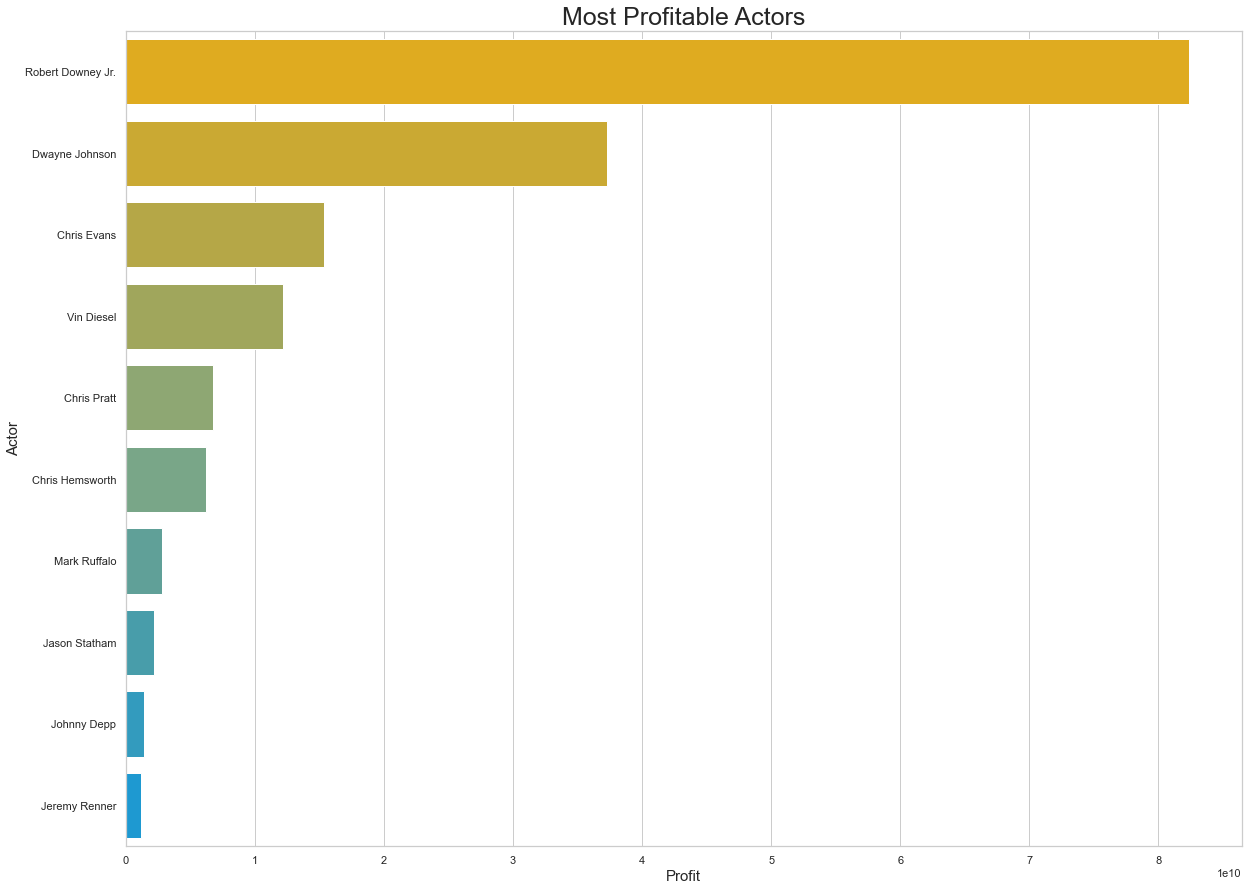

In [225]:
# Displaying sum of profit by actors
fig2, ax2 = plt.subplots(figsize=(20, 15))

x = top_10_genres["worldwide_profit"]
y = actors_profit["primary_name_x"]

sns.set(style="whitegrid", color_codes=True)
                        
sns.barplot(x, y, palette='blend:#FFB900,#00A4EF', orient="h")

ax2.set_title('Most Profitable Actors', fontsize=25)
ax2.set_xlabel('Profit', fontsize=15)
ax2.set_ylabel('Actor', fontsize=15)

### First hypothesis: genre and profit 

### Second hypothesis: runtime and profit: is there a perfect combination for movie length? 

### Third hypothesis: actors

In [101]:
# Creating a common column of movie_title among the df_tn and movie_basics which will be merged later 

# Creating column movie_episode if there were more than 1 movie
df_bom["movie_episode"] = df_bom["title"].str.split(r":").str[1].fillna("").str.title()

# Creating column movie_title if there were more than 1 movie
df_bom["movie_title"] = df_bom["title"].str.split(pat="Ep.").str[0].str.split(pat="Part").str[0].str.split(r"[:)(]").str[0].str.strip().str.title()

# Creating column combining the movie title and the episode to have the same way in both
df_bom["movie_title_episode"] = df_bom["movie_title"] + df_bom["movie_episode"].str.split(r"[:)(]").str[0].str.title()

# df_tn[["movie", "movie_title", "movie_episode", "movie_title_episode"]]
df_bom[df_bom["title"].str.contains("(?i)avengers")]



,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,movie_episode,movie_title,movie_title_episode
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08,Infinity War,Avengers,Avengers Infinity War


In [102]:
# Creating a common column of movie_title among the df_tn and movie_basics which will be merged later 

# Creating column movie_episode if there were more than 1 movie
df_tn["movie_episode"] = df_tn["movie"].str.split(r":").str[1].fillna("").str.title()

# Creating column movie_title if there were more than 1 movie
df_tn["movie_title"] = df_tn["movie"].str.split(pat="Ep.").str[0].str.split(pat="Part").str[0].str.split(r"[:)(]").str[0].str.strip().str.title()

# Creating column combining the movie title and the episode to have the same way in both
df_tn["movie_title_episode"] = df_tn["movie_title"] + df_tn["movie_episode"].str.title()

# df_tn[["movie", "movie_title", "movie_episode", "movie_title_episode"]]
df_tn[df_tn["movie_title"].str.contains("Star Wars")]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,clean_movie,worldwide_profit,year,movie_episode,movie_title,movie_title_episode
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Star Wars Ep. VII: The Force Awakens,1747311220,2015,The Force Awakens,Star Wars,Star Wars The Force Awakens
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi,999721747,2017,The Last Jedi,Star Wars,Star Wars The Last Jedi
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,115000000,474544677,1027044677,Star Wars Ep. I: The Phantom Menace,912044677,1999,The Phantom Menace,Star Wars,Star Wars The Phantom Menace
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,Star Wars Ep. IV: A New Hope,775598007,1977,A New Hope,Star Wars,Star Wars A New Hope
304,5,"May 19, 2005",Star Wars Ep. III: Revenge of the Sith,115000000,380270577,848998877,Star Wars Ep. III: Revenge of the Sith,733998877,2005,Revenge Of The Sith,Star Wars,Star Wars Revenge Of The Sith
305,6,"May 16, 2002",Star Wars Ep. II: Attack of the Clones,115000000,310676740,656695615,Star Wars Ep. II: Attack of the Clones,541695615,2002,Attack Of The Clones,Star Wars,Star Wars Attack Of The Clones
1783,84,"May 25, 1983",Star Wars Ep. VI: Return of the Jedi,32500000,309205079,572705079,Star Wars Ep. VI: Return of the Jedi,540205079,1983,Return Of The Jedi,Star Wars,Star Wars Return Of The Jedi
2367,68,"May 21, 1980",Star Wars Ep. V: The Empire Strikes Back,23000000,290271960,534161334,Star Wars Ep. V: The Empire Strikes Back,511161334,1980,The Empire Strikes Back,Star Wars,Star Wars The Empire Strikes Back
3831,32,"Aug 15, 2008",Star Wars: The Clone Wars,8500000,35161554,68695443,Star Wars: The Clone Wars,60195443,2008,The Clone Wars,Star Wars,Star Wars The Clone Wars


In [103]:
# Same process in movie_basics 

# Creating column movie_episode if there were more than 1 movie
movie_basics["movie_episode"] = movie_basics["primary_title"].str.split(r":").str[1].fillna("").str.title()

# Creating column movie_title if there were more than 1 movie
movie_basics["movie_title"] = movie_basics["primary_title"].str.split(pat="Ep.").str[0].str.split(pat="Part").str[0].str.split(r"[:)(]").str[0].str.strip().str.title()

# Creating column combining the movie title and the episode to have the same way in both
movie_basics["movie_title_episode"] = movie_basics["movie_title"] +  movie_basics["movie_episode"].str.title()

# df_tn[["movie", "movie_title", "movie_episode", "movie_title_episode"]]
movie_basics[movie_basics["movie_title"].str.contains("(?i)Avengers")]



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,clean_primary,movie_episode,movie_title,movie_title_episode
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",The Avengers,,The Avengers,The Avengers
1030,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action,The Avengers Assemble Premiere,,The Avengers Assemble Premiere,The Avengers Assemble Premiere
9562,tt1564369,Scavengers,Scavengers,2013,94.0,Sci-Fi,Scavengers,,Scavengers,Scavengers
20812,tt1864488,Scavengers' Union,Somateio rakosyllekton,2011,74.0,"Documentary,News",Scavengers' Union,,Scavengers' Union,Scavengers' Union
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,Age Of Ultron,Avengers,Avengers Age Of Ultron
48005,tt2849634,Los Scavengers,Los Scavengers,2014,82.0,"Adventure,Family",Los Scavengers,,Los Scavengers,Los Scavengers
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,Infinity War,Avengers,Avengers Infinity War
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",Avengers: Endgame,Endgame,Avengers,Avengers Endgame
105584,tt6172666,Avengers of Justice: Farce Wars,Avengers of Justice: Farce Wars,2018,87.0,"Action,Comedy,Family",Avengers of Justice: Farce Wars,Farce Wars,Avengers Of Justice,Avengers Of Justice Farce Wars
138087,tt8875872,Avengers: Reassembled,Avengers: Reassembled,2018,52.0,Sci-Fi,Avengers: Reassembled,Reassembled,Avengers,Avengers Reassembled


In [104]:
# Filtering on movies above 500 million dollars
half_million_bom = df_bom[df_bom["total_gross"] > 500000000]
half_million_bom

half_million_bom

KeyError: 'total_gross'

In [ ]:
# Join on movie title and year 
halfmillionbom_basics = pd.merge(half_million_bom, movie_basics, how="left", left_on=["movie_title"], right_on=["movie_title"])

halfmillionbom_basics.head()


In [ ]:
# Verifying whether any movie were not joined
halfmillionbom_basics[halfmillionbom_basics["movie_id"].isnull()]

Replacing manually the movie_title of movies to match the ones from movie_basics: 3 of them did not match:
1. Avengers 
2. Men in Black 3 
3. Dr. Seuss' The Grinch

In [ ]:
# Replacing Avengers at row 727, as this is the movie from 2012 - corresponding to the one we are trying to merge

In [ ]:
df_bom[df_bom["movie_title"].str.contains("(?i)avengers")]

In [ ]:
df_bom.at[727, "movie_title"] = 'The Avengers'
df_bom.at[727, "movie_title_episode"] = 'The Avengers'

In [ ]:
df_bom[df_bom["movie_title"].str.contains("(?i)avengers")]

In [ ]:
# Replacing MIB 3 at row 736

In [ ]:
# How the movie title is defined on the bom dataframe
df_bom[df_bom["movie_title"].str.contains("(?i)mib")]

In [ ]:
# How it should look like to be joined to movie_basics 
movie_basics[movie_basics["movie_title"].str.contains("(?i)men in black")]

In [ ]:
df_bom.at[736, "movie_title"] = 'Men In Black 3'
df_bom.at[736, "movie_title_episode"] = 'Men In Black 3'

In [ ]:
df_bom[df_bom["movie_title"].str.contains("(?i)Men In Black 3")]

In [ ]:
df_bom[["movie_title", "movie_title_episode"]]

In [ ]:
# Replacing Dr. Seuss' to the one we are trying to merge

In [ ]:
# How the movie title is defined on the bom dataframe
df_bom[df_bom["movie_title"].str.contains("(?i)seuss")]

In [ ]:
# How it should look like to be joined to movie_basics 
movie_basics[movie_basics["movie_title"].str.contains("(?i)grinch")]

In [ ]:
df_bom.at[3096, "movie_title"] = 'The Grinch'
df_bom.at[3096, "movie_title_episode"] = 'The Grinch'

In [ ]:
df_bom[df_bom["movie_title"].str.contains("(?i)The Grinch")]

In [ ]:
# Verifying whether any movie were not joined
halfmillionbom_basics[halfmillionbom_basics["movie_id"].isnull()]

In [ ]:
# Now refiltering and joining two tables, verifying no movie was left unmerged

In [ ]:
# Filtering on movies above 500 million dollars
half_million_bom = df_bom[df_bom["total_gross"] > 500000000]
half_million_bom

half_million_bom

In [ ]:
# Join on movie title and year 
halfmillionbom_basics = pd.merge(half_million_bom, movie_basics, how="left", left_on=["movie_title", "year"], right_on=["movie_title", "start_year"])

halfmillionbom_basics.head()


In [ ]:
# Verifying whether any movie were not joined
halfmillionbom_basics[halfmillionbom_basics["movie_id"].isnull()]

In [ ]:
halfmillionbom_basics.head()

### What was the genre of these movies? 

In [ ]:
# Dropping duplicated and not needed columns  

halfmillionbom_basics = halfmillionbom_basics.drop(["title", "start_year", "movie_episode_y", "movie_title_episode_y"], axis=1)
halfmillionbom_basics.head()

In [ ]:
halfmillionbom_basics["genres"] = halfmillionbom_basics["genres"].str.split(",")

# for row in halfmillionbom_basics["genres"]:
#     print(row.split(","))
#     halfmillionbom_basics["genres"] = row.split(",")

# halfmillionbom_basics = halfmillionbom_basics.explode("genres")
halfmillionbom_basics.head()

In [ ]:
# Exploding genres to be able to identify movies that have several genres
halfmillionbom_genres = halfmillionbom_basics.explode("genres")

In [ ]:
halfmillionbom_genres.head()

In [ ]:
# List of unique values in genres 

halfmillionbom_genres["genres"].unique()

In [ ]:
halfmillionbom_genres[halfmillionbom_genres["genres"] == "Adventure"]

In [ ]:
# Groupby total revenue by genres

# df.groupby(['Fruit','Name']).sum()
# df.groupby(['Sex', 'Pclass'])['Survived'].mean()
# genres_revenue = halfmillionbom_genres.groupby("genres")["total_gross"].sum().reset_index().sort_values("total_gross", ascending=False)
# genres_revenue = halfmillionbom_genres.groupby("genres")["total_gross"].agg([("number_movies", "count"), ("worldwide_gross", "mean")]).sort_values("worldwide_gross", ascending=False).reset_index()
genres_revenue = halfmillionbom_genres.groupby("genres")["total_gross"].count().reset_index().sort_values("total_gross", ascending=False)

genres_revenue


In [ ]:
# Setup plots
# fig, ax = plt.subplots(figsize=(16,10))
# Create variables for easier use
# genres = genres_revenue["genres"]
# wwbox_office = genres_revenue["worldwide_gross"]

# Plot data 
# ax.barplot(genres, wwbox_office)
ax = genres_revenue.plot.barh(x="genres", y="worldwide_gross", figsize=(16,10))
ax.invert_yaxis()



# Customize appearance
ax.tick_params(axis="x")
ax.set_xlabel("Worlwide Gross Box Office")
ax.set_ylabel("Genres")
ax.set_title("Worldwide Box Office by Movies' Genres");



In [ ]:
# Transforming genres as category type to allow correlation to be calculated between the 2 columns
genres_revenue["genres_cat"] = genres_revenue["genres"].astype("category").cat.codes
genres_revenue


In [ ]:
col1 = genres_revenue["genres_cat"]
col2 = genres_revenue["worldwide_gross"]

corr = col1.corr(col2)

print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))



In [ ]:
'''

Only if decide to switch again to using the df_tn

'''

In [ ]:
# Filtering on movies above 500 million dollars
half_million_movies = df_tn[df_tn["worldwide_gross"] > 500000000]
half_million_movies

In [ ]:
len(half_million_movies)

There are 199 movies that made box office revenues higher than 500 million dollars. 

The analysis will be based on these.

In [ ]:
half_million_movies[["year", "movie_title"]].reset_index()

In [ ]:
onebillion_titles = half_million_movies["movie_title"].tolist()
onebillion_titles

### What was the genre of these movies? 

Genres are indicated in the df_rt table and have the id column. 
Join one billion plus movies to this table to identify the main info of these movies, including genres - 
but also runtime? 

In [ ]:
movie_basics[["primary_title", "start_year"]]

In [ ]:
top_movies = half_million_movies["movie_title"].tolist()

for movie in top_movies:
    print(movie_basics[movie_basics["movie_title"] == movie]["movie_title"].tolist())

In [ ]:
movie_basics[movie_basics['movie_title'].isin(top_movies)]

In [ ]:
"""
Verifying how the titles in both dataframes could match. 
The ones not automatically identified were those with colons:

Star Wars Ep. VII: The Force Awakens'
Harry Potter and the Deathly Hallows: Part II'
Star Wars Ep. VIII: The Last Jedi'

""" 

In [ ]:
# Now join on year and movie_title


In [ ]:
half_million_movies[half_million_movies["movie"].
                   str.contains("(?i)The Force Awakens")]


In [ ]:
movie_basics[movie_basics["primary_title"].
             str.contains("(?i)Pirates of the Caribbean")]


In [ ]:
movie_basics[movie_basics["movie_title"].
                   str.contains("(?i)avatar'")]


In [ ]:
# df_tmdb[df_tmdb["original_title"].str.contains("(?i)Star Wars")]

Join the two dataframes

In [ ]:
# Join on movie title and year 
halfmillion_basics = pd.merge(half_million_movies, movie_basics, how="left", left_on=["movie_title"], right_on=["movie_title"])

halfmillion_basics.head()








In [ ]:
# Review the ones that did not get merged
# Can we estimate that Avatar 1 and 2 are the same genres. probably, in which case could merge on movie and not movie_title
# only for those missing. 
# Drop those rows and add the modified ones.


In [ ]:
halfmillion_basics[halfmillion_basics["genres"].isnull()]["movie"].tolist()

In [ ]:
# does id 1 in df_rt correspond to Avatar?

# df_rt[df_rt["id"] == 1]


In [ ]:
# df_rt id does not correspond to the ids of the movies in half_million_movies. 

In [ ]:
persons_df["primary_name"].unique()

In [ ]:
# are there other currencies than box office? 

df_rt[df_rt["currency"].notnull()]["currency"].unique()

# no - only $

In [ ]:
# Inspect overall shape and info of the dataframe
df_rt.shape
df_rt.info()

In [ ]:
# missing revenues in box office in df_rt but is it the same info in the first table

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Using a Google sheet, I have listed all column names from all dataframes/tables to identify the ones I wanted to keep for the analysis.

The table df_tn seem to have all the necessary information to calculate performance: 

    1. domestic
    2. foreign 
    3. worldwide gross
    4. production budgets

It was verified before that how titles are named in df_bom don't represent the majority of how they are named in other tables, whereas df_tn do.

Let's verify that worldwide gross indicated in df_tn correspond to the one indicated in df_bom 

In [ ]:
movie_non_null = movie_basics[movie_basics["original_title"].notnull()]

movie_non_null[movie_non_null["original_title"].str.contains("Avengers")]

In [ ]:
# Avengers in movie_akas

movie_akas_df[(movie_akas_df["title"].str.contains("Avengers")) & (movie_akas_df["is_original_title"] == 1)]



In [ ]:
# movie title in movie_budgets

df_tn[df_tn["movie"].str.contains("Avengers")]

In [ ]:
df_tn[df_tn["movie"].str.contains("The Avengers")]

In [ ]:
df_bom[df_bom["title"].str.contains("The Avengers")]

In [ ]:
movie_basics.head()

In [ ]:
# First, try to add movie_id to df_bom
new_df = pd.merge(df_tn, movie_basics, how="left", left_on=["movie", "year"], right_on=["primary_title", "start_year"])
new_df

# using left join because can only measure the movies that have revenue associated to it



In [ ]:
# verify that avatar does not have a start date on movie_basics
movie_basics[movie_basics["primary_title"].notnull().astype(str).str.contains("(?i)avatar")]

In [ ]:
df_bom[df_bom["title"].str.contains("(?i)avatar")]

In [ ]:
movie_akas_df[(movie_akas_df["title"].str.contains("(?i)avatar")) 
              & (movie_akas_df["is_original_title"] == 1)]


In [ ]:
# Here you run your code to clean the data


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [ ]:
# Closing connection
# conn.close()